$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\di}[0]{\text{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\cplxi}[0]{\text{i}}$
$\newcommand{\unit}[1]{\mathbf{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$
$\newcommand{\stirling}[2]{\genfrac{[}{]}{0pt}{}{#1}{#2}}$

In [1]:
from IPython.display import Image, display, YouTubeVideo, HTML, Video
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive, rcParams, animation
from ipywidgets import interact, FloatSlider, fixed, IntSlider
from scipy.constants import pi  # otherwise it's too annoying to type np.pi
interactive(True)
rcParams['figure.dpi'] = 150  # for crisper figures later

*Readings:*

* *Chapter 12 of Taylor. Our librarian was able to make this chapter available on Quercus.*
* *Baker & Gollub is a whole textbook dedicated to the topic, and probably too long for you to read entirely. It also assumes a somewhat higher level than you probably have. Use it as a side resource: if there is something you don't understand in the notes, look up the concept in their table of content and go directly to the corresponding sub-section.*

# Introduction

We keep going with our description of the damped-driven pendulum, though in this lecture we focus on what makes the system chaotic, introcugin more adapated visualization tools: Poincaré sections and bifurcation diagrams.
In the second half of this lecture, we focus on a simpler system that exhibits chaos: the logistic map.
It is used in population dynamics and not classical mechanics, but we know by now that this course was about using classical examples as a pretense to solve universal questions, so, it should not come as a shock.
Because the logistic map is easier to simulate, it will allow me to introduce in more detail two features of chaos: the sub-critical cascade as a route to chaos, and the Lyapunov exponent as a measure of the sensitivity to initial conditions.

# Requirements for chaos

Chaos refers to the irregularity or unpredictability of certain motions.
It is important to note that this "unpredictability" is **not** because we don't understand the equations that govern the system. We can solve the equations, but inherently, the solutions cannot be predicted long in advance.
In other words, you can know the equations perfectly and still end up with chaos.
This type of chaos is called **Deterministic chaos**, and is a feature of many systems of ordinary differential equations.

Perhaps the most defining feature of chaotic systems is their **sensitivity to initial conditions**: if we knew initial conditions perfectly, we could technically predict the outcome equally as perfectly.

This is what Pierre-Simon Laplace was writing about in 1814 in *A philosophical[^3] essay on probabilities*:
> We may regard the present state of the universe as the effect of its past and the cause of its future.
    An intellect which at a certain moment would know all forces that set nature in motion, and all positions of all items of which nature is composed, if this intellect were also vast enough to submit these data to analysis, it would embrace in a *single formula* the movements of the greatest bodies of the universe and those of the tiniest atom;
        for such an intellect nothing would be uncertain and the future just like the past would be present before its eyes.

This "intellect" came to be known as "Laplace's demon".
Technically, had QM not happened, Laplace would have probably been right even about classical chaotic systems.
But it is fundamentally impossible for such an intellect to exist, because even this formidable intellect would need a measuring device, and there is no version of the future where the perfect measuring device exists (again, QM will always be a hard limit on which hope and dreams crash).
Therefore, chaos.

[^3]: "Philosophy" had a wider meaning than it does today, although scientists still get Ph.D.'s or D.Phil.'s for their highest attainable degree.

In order to study nonlinear systems, we are going to write our equations in a specific form.
Any system of ODEs, of **whatever** order, can be written as series of first-order ODEs for appropriately defined $x_n$'s:
\begin{align*}
\dot x_1 & = F_1(x_1,x_2,...,x_N)\\
\dot x_2 & = F_2(x_1,x_2,...,x_N)\\
& \vdots\\
\dot x_N & = F_N(x_1,x_2,...,x_N)
\end{align*}

The two necessary condition for chaos to occur is that

* $N\ge 3$, and that
* the system be nonlinear.

Notice there is no $t$ as an independent variable on the right hand side of the above equations.  We will see that $t$ can become one of these $x_i$'s in the system of equations.  

You can do that for any ODE indeed: take $\odeln5x t = 10$ for example.
You can define $x_1 \equiv x$, and this system becomes 
$$x_2 = \dot x_1,\quad x_3 = \dot x_2,\quad x_4 = \dot x_3,\quad x_5 = \dot x_4 \andeq\dot x_5 = 10.$$ 
Note that these equations are all linear: the first necessary condition is met, but not the second one.
There can be no chaos in this system, adopting an exponential will give you the solution.

Also, those conditions are necessary, not sufficient: the non-linear wave examples featured a large (pendulum chain) or infinite (water waves) number of degrees of freedom, non-linearity, and yet, their soliton solutions were perfectly predictable and not chaotic, which made them so special.

To solidify this concept, here is another counter-example: something that is **unpredictable, yet not chaotic**: Brownian motion, which itself is an example of a random walk.
Brownian motion is experienced by e.g., a piece of pollen on the surface of water.
The pollen gets tossed around by collisions with surrounding water particles, making the motion erratic and unpredictable.
Yet this motion is **not** chaotic: the motion is unpredictable because of *external* circumstances, the collisions with the water molecules.
The motion itself is very linear, it's just projectile motion between two collisions.
But in the absence of information about the water molecules, the motion is *not deterministic*: it is as if the next move will be drawn from the roll of a dice.
This is especially important in QM, where outcomes of given processes are inherently drawn from distributions.

The DDP on the other hand was started at a very specific angle and initial velocity, and yet, it was unpredictable. 
Chaos is about a system being *internally*, or inherently, unpredictable.
And yet, it was *deterministic*: actions or initial conditions led to unambiguous outcomes.

|               | Stochastic processes | Chaotic processes |
| :------------- | :--------------------: | :-----------------: |
| Unpredictable? | Yes | Yes |
| Why?          | External reasons | Sensitivity to initial conditions |
| Deterministic? | No (probabilistic) | Yes ($x = \int\dot x \di t$) |

This table is of course probably too simplistic...

Traditionally, physicists sort chaotic systems into two categories:

* Hamiltonian systems: In those, mechanical energy is conserved, chaos is deterministic, the system remembers its initial conditions for ever, and the dynamics does not feature attractors. **The** historical example is the three-body problem, which pretty much laid the foundation of chaos theory. Poincaré published it in in 1889, then retracted it, only to publish the fully corrected version about a decade later, in the form of a whole book. I won't say much more about this in this lecture, but you may see it in PHY354.
* Damped-dissipative systems. The DDP is one. Chaotic dynamics in this category tend to end up in "attractors", and contrary to the first category where you could technically revert time and end up with the initial conditions, these systems forget about their initial conditions. In other words, if you pick the system in or around its attractor, going back in time would leave you with too many possible initial conditions. This is the category we will study, because it features many important concepts of chaos, while being simple to set up.

In what follows, I will re-introduce the simulations and visualizations I used at the end of the previous lecture, but I will focus on the transition to chaos that happened between $\beta=0.9$ and $\beta = 1.2$.
I will use the visualisation tools that we know of:

* time series,
* phase plots,
* Fourier plots (with no requirement that you fully understand everything about them)

I will then add two new visualisation tools, more adapted to chaotic dynamics:

* bifurcation diagrams,
* Poincaré sections.

# Transition to chaos for the damped, driven pendulum (DDP)

We introduced it in lecture 11, but let's remind ourselves of the system at stake. Our non-linear pendulum is lightly damped with damping coefficient $\gamma$, and it is driven at angular frequency $\omega_d$ (*not* the damped pseudo-frequency of lecture 4; I have redefined $\omega_d$ to be the driving frequency, because I will need to keep $\omega$ as a free variable for Fourier visualizations).

The equation of motion is
$$\ddot \theta + 2\gamma \dot \theta + \omega_0^2\sin\theta = \omega_0^2 \beta \cos(\omega_d t),$$
with $\beta$ some measure (in rad) of how hard we drive it.

Define $x_1 \equiv \theta$ and $x_2 \equiv \dot\theta=\dot x_1$, and $x_3 \equiv \omega_d t$. Then we can write this system as follows:

$$\left.\begin{array}{cclc}\dot x_1&=&x_2&\mbox{ (linear) }\\
\dot x_2&=&-2\gamma x_2 -\omega_0^2\sin x_1+\beta\omega_0^2\cos x_3&\mbox{ (nonlinear) }\checkmark\\
\dot x_3 &=& \omega_d&\mbox{ (linear)}
\end{array}\right\} n=3\checkmark$$

We now have a system of three 1st order equations for $x_1, x_2, x_3$ and there is nonlinearity in the system (because of the $\cos$ and $\sin$ terms).  So there is a possibility of chaos.

In lecture 11, we took $g=9.8$ m/s$^2$, $\ell = 1$ m, $\gamma = \omega_0/4$, $\omega_d = 2\omega/3$ and saw what happened for $\beta = 0.2$ (linear), $\beta=0.9$ (appearance of super-harmonics due to the internal dynamics of the non-linear oscillator, but still a single-period, predictive cycle) and $\beta = 1.2$ (messy).
Before analyzing this system further, define parameters and main routines.
I will use the notation $T_d = 2\pi/\omega_d$ for the driving period.

## Setting up Python, remembering the linear case

### Visualisations we know

In [2]:
ftsz = 12  # font size
m = 1.0  # [kg] mass
g = 9.8  # [m/s] gravity
l = 1.0  # [m] pendulum length
omega0 = (g/l)**.5

In [3]:
omegad = 2*omega0/3  # driving frequency
Td = 2*pi/omegad  # driving period
gamma = omega0/4  # damping
ntTd = 500  # number of time steps per driving period

In [5]:
dt = Td/ntTd  # time step
num_cycles = 40  # number of dirving periods
t_end = num_cycles*Td  # final time
nt = ntTd*num_cycles  # number of time steps

time = np.arange(0., t_end, dt)  # initialize the time array

In [6]:
theta0 = -pi/2  # initial angle
dottheta0 = 0.0  # initial angular velocity

Writing down all the routines in cells takes a lot of space, and is impractical if we need to change them.
What I've done is that I have copied and pasted last lecture's routines (generating time series, plotting time series, phase, plots...) in a script called `ddp_routines.py`. We can load the functions as a Python module like below.

In [31]:
import ddp_routines as ddp

In [8]:
# Here is an example we saw last lecture.
beta = 0.2  # driving amplitude = F0/(m L omega0**2) with F0 driving torque
theta, dottheta = ddp.generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, time)

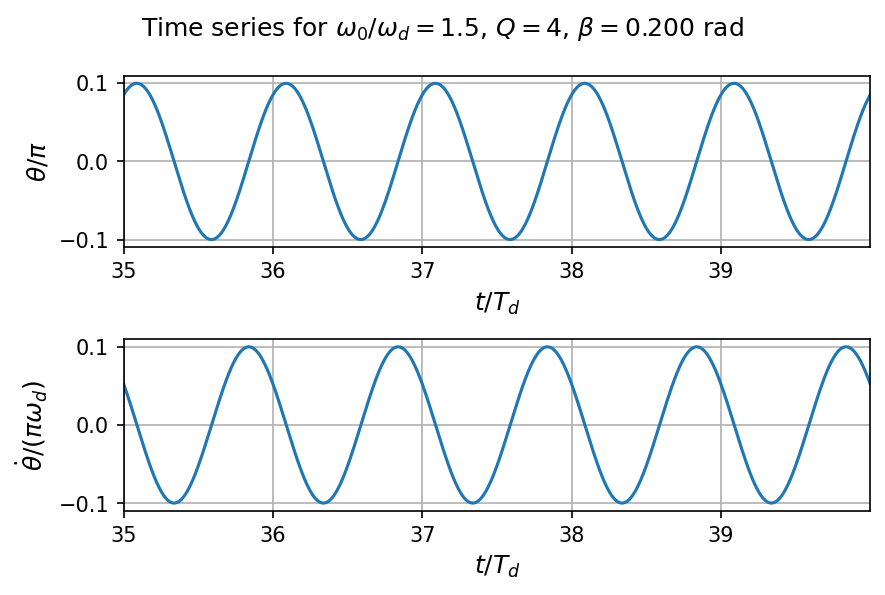

In [9]:
ddp.plot_TS(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, tmin=35.)

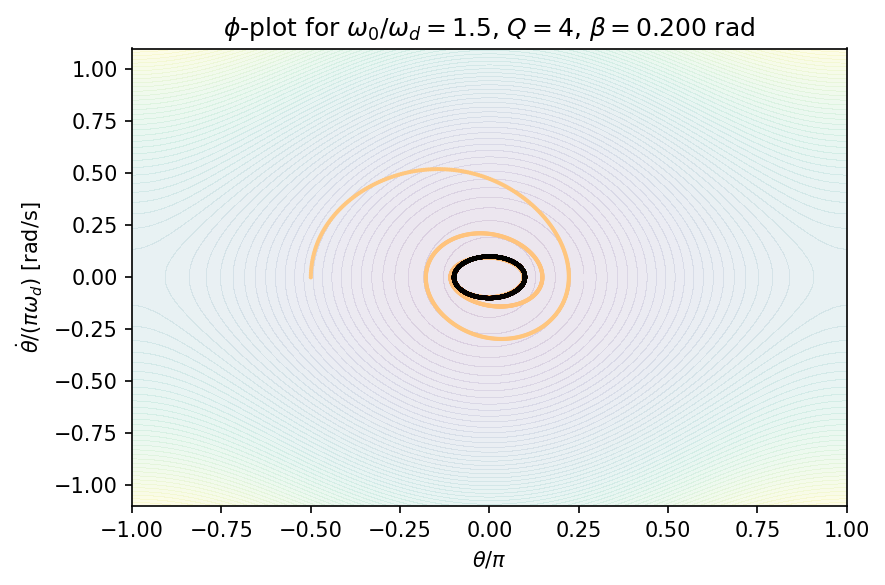

In [10]:
ddp.plot_phase(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, nconts=64)

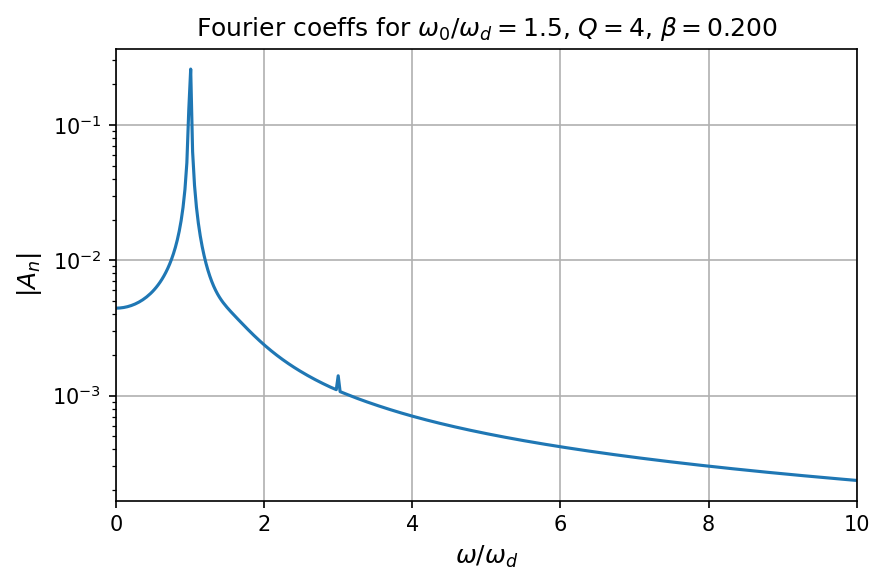

In [11]:
ddp.plot_spectrum(theta, omegad, omega0, beta, gamma, time, 4., ftsz)

### Poincaré section

Let's now look at a new way to visualize the dynamics. Now that we know that we have three equations, we know that our phase plots should have been 3D (or maybe we didn't know it, and I'm telling you): the appropriate phase plot should have been in $(\theta, \omega_d t, \dot\theta)$-space.
And because the $\omega_d t$ axis is also associated with periodic motion (the forcing), we would also fold it on itself every $\omega_dt =2\pi$, just like the $\theta$ axis. Like the sketch below.

![](3D_phase_space.png)

So, the dynamics cane be pretty complicated to visualize if phase trajectories start going in all directions. What we've done so far in our phase plots was to take all points and to collapse them on the $(\theta, \dot\theta)$ plane. But it showed its limits in the last case of the last lecture, with $\beta=1.2$.

Another way to simplify the visualization is to only plot one point every forcing period, which visually looks like slicing the phase-space across one value of $\omega_d t$.
This is called a **Poincaré section**. Let's see what it would look like in our first three examples.

I reproduce the routine to draw a Poincaré section below, but the one I actually use is in the `ddp` module.
They should be identical.

In [32]:
def Poincare_section(n_cyc, n_per_Td, it_min, th, dth, t, wd, w0, g, b, ftsz):
    """ draw Poincare section; ncyc is how many forcing cycles we computed, 
    n_per_Td is how many iterations per driving cycle, it_min is where we start
    (to skip transient), th is theta, dth is dtheta/dt 
    """
    
    # Then, we select which points we need
    PC_t = t[it_min::n_per_Td]*2*pi/wd  # the time array: start at it_min, skip every n_per_cyc
    Pc_th = th[it_min::n_per_Td]  # theta sub-array
    PC_dth = dth[it_min::n_per_Td]  # dtheta/dt sub-array
    
    Pc_th_wrapped = ddp.wrap_theta(Pc_th)
    ddp.plot_phase(Pc_th_wrapped, PC_dth, wd, w0, b, g, PC_t, ftsz, nconts=32)
    return

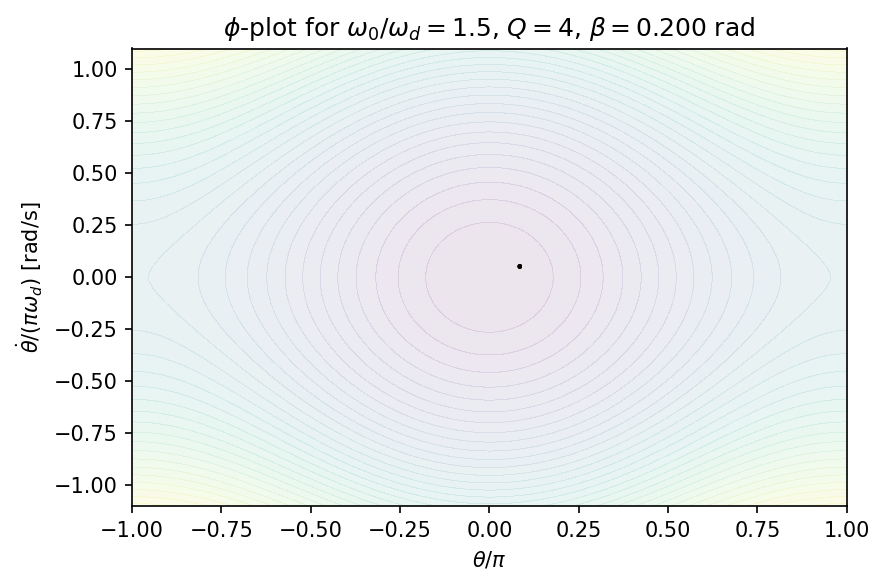

In [13]:
# we have already generated the time series in the example below.
ddp.Poincare_section(num_cycles, ntTd, 4*ntTd, theta, dottheta,
                     time, omegad, omega0, gamma, beta, ftsz)

Do you see the Poincaré section? It's the little speck near the middle of the picture, around $\theta=0.1$.
Of course, a Poincaré section is useless for a single-cycle periodic motion, because it shows the same point over and over again.
The case $\beta = 0.9$ would show something similar, because superharmonics are "filtered out" in a Poincaré section. 

## Two-period attractor: $\beta=1.07$

After $\beta=1$, things evolve quickly.
Let's try $\beta=1.07$, which is just before chaos starts.
We first plot the time series, the phase plot, and the Fourier coefficients because we haven't seen this experiment before.

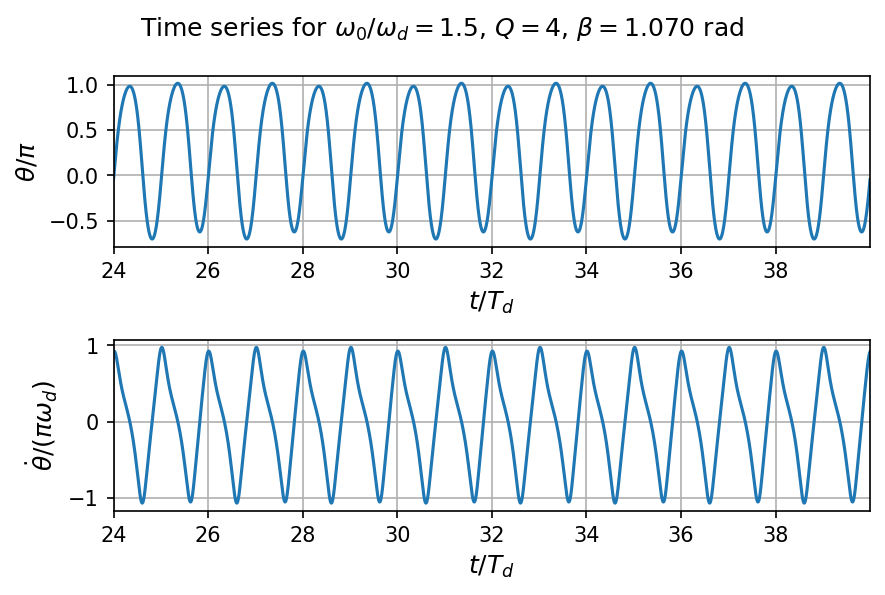

In [14]:
beta = 1.07  # have to run a new one
theta, dottheta = ddp.generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, time)
ddp.plot_TS(theta, dottheta, omegad, omega0, beta,
                gamma, time/Td, ftsz, tmin=24.)

If you look closely at the values of the local extrema (it is a bit more visible in the local minima of $\theta$), you see  a two-cycle periodicity: the minima located just before even numbers of periods ($t/T_d \approx 26$, $28$,...) are slightly below those in-between.

In the Fourier plots, we can see a *sub-harmonic* appear at $\omega_d/2$. You can also notice that peaks start appearing between integer numbers of the frequency, which is how the non-linear term $\sin\theta$ in the pendulum reacts to the appearance of a sub-harmonic motion. See below.

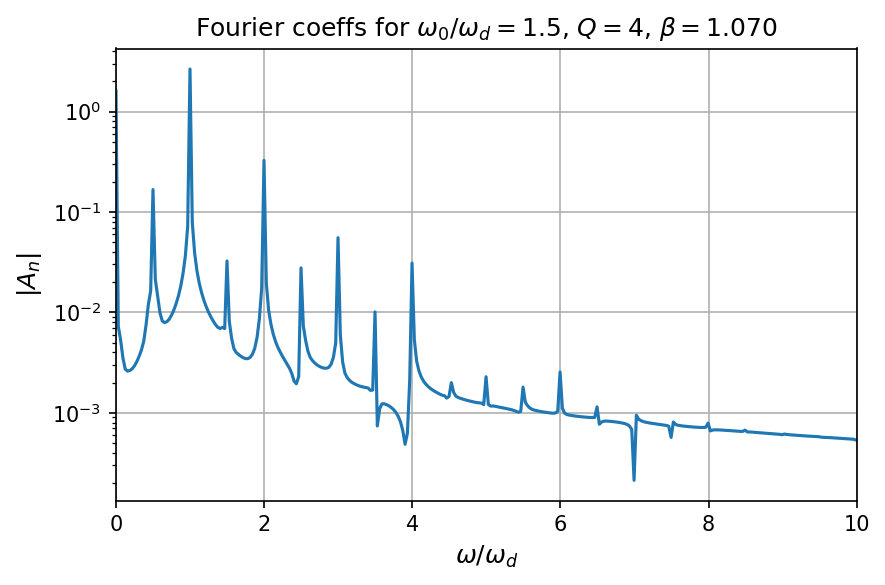

In [15]:
ddp.plot_spectrum(theta, omegad, omega0, beta, gamma, time, 24., ftsz)

As for the phase plot, see below.

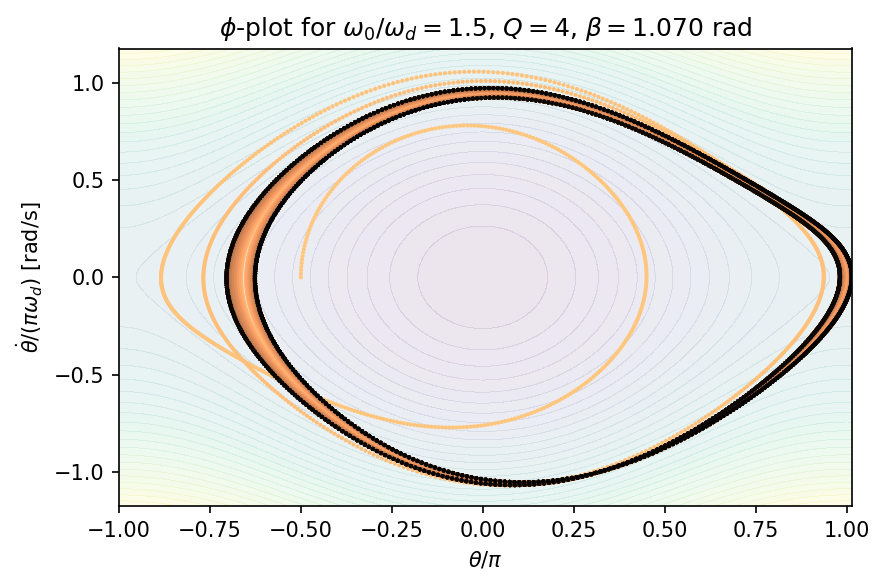

In [16]:
ddp.plot_phase(theta, dottheta, omegad, omega0, beta, gamma, time, ftsz, nconts=32)

Focus on the dark traces, which are the stationary regime (the darker traces correspond to the early transient).
The full cycle indeed appears to be split into two, but it is still closed and therefore periodic.
We can thus characterize this motion with 2 periods:

1. the time it takes to cover an angle of $2\pi$ around the graph and
2. the time it takes to get back to exactly the same spot as before, which is $2T_d$.

In the Poincaré section, the first period is the time it takes to go from one dot to the other dot (this is the driving frequency).  The second period is the time it takes to go from 1 dot to the other dot then back to the first dot. In this example that is twice the driving period (or equivalently, half the driving frequency).  This attractor is known as a "two period cycle" because you bounce between 2 cycles.

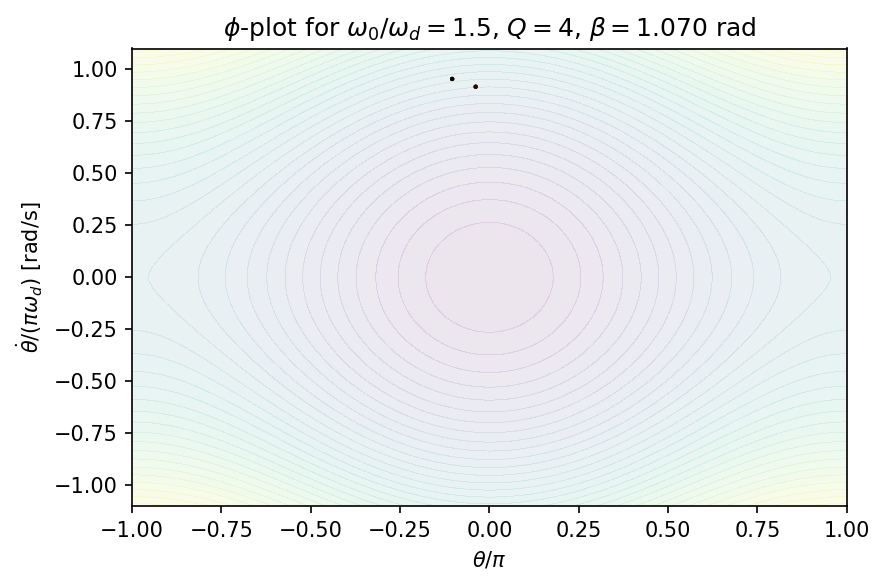

In [16]:
ddp.Poincare_section(num_cycles, ntTd, 24*ntTd, theta, dottheta,
                     time, omegad, omega0, gamma, beta, ftsz)

## More than one attractor: $\beta = 1.077$

At first, we can re-do the same simulation with $\beta=1.077$.

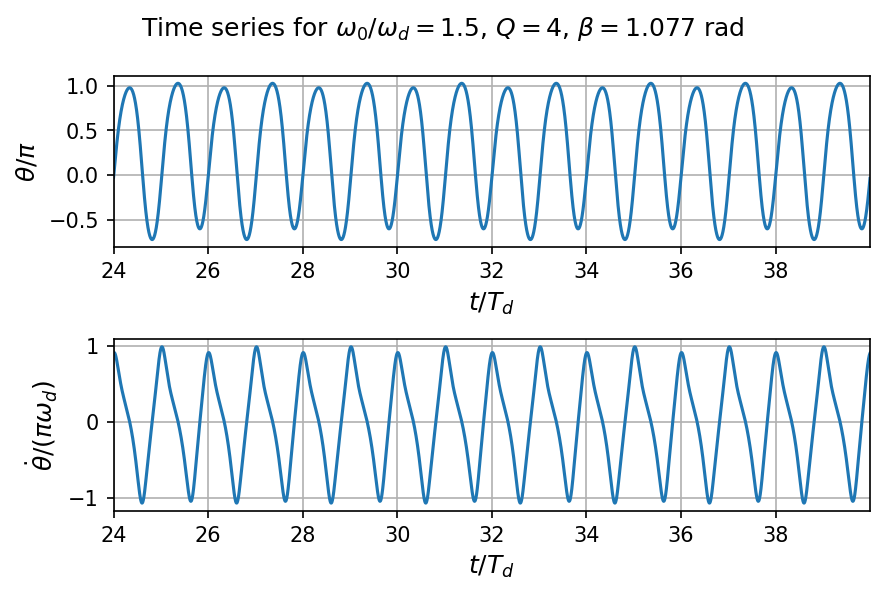

In [17]:
beta = 1.077  # have to re-run it
theta, dottheta = ddp.generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, time)
ddp.plot_TS(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, tmin=24.)

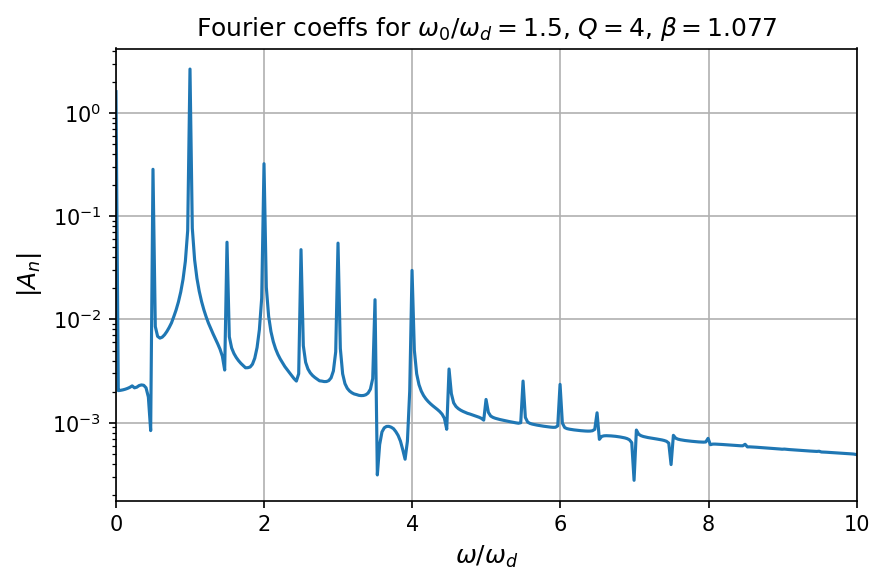

In [18]:
ddp.plot_spectrum(theta, omegad, omega0, beta, gamma, time, 24., ftsz)

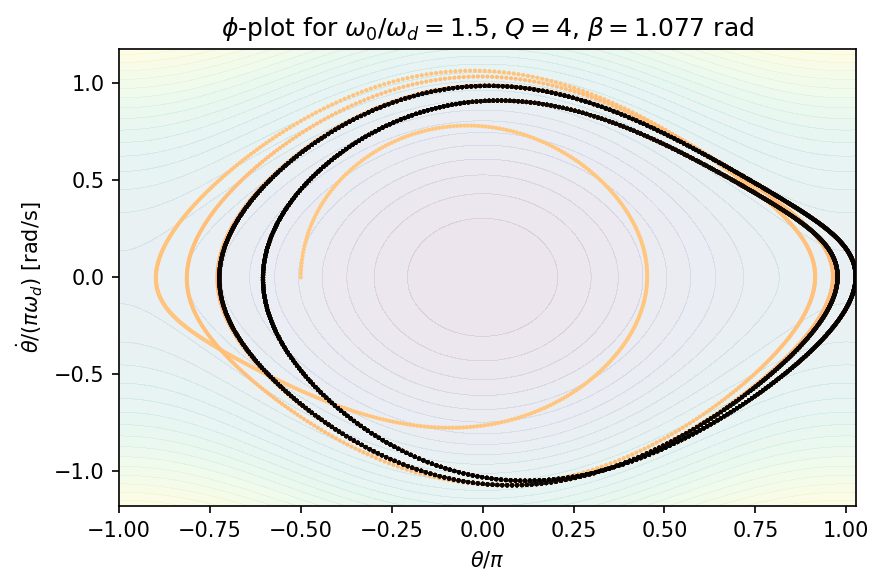

In [19]:
ddp.plot_phase(theta, dottheta, omegad, omega0, beta, gamma, time, ftsz, nconts=32)

You'd be excused to think that not much has happened, except for the amplitude and the phase. But change the initial condition and something happens: 

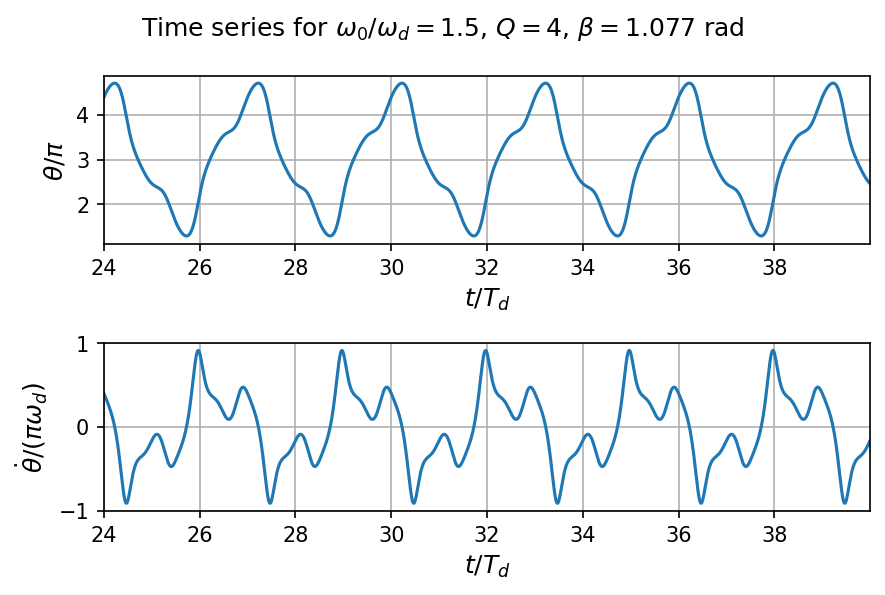

In [20]:
theta, dottheta = ddp.generate_time_series(
    0., dottheta0, omegad, omega0, beta, gamma, time)  # replace theta0 with 0.
ddp.plot_TS(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, tmin=24.)

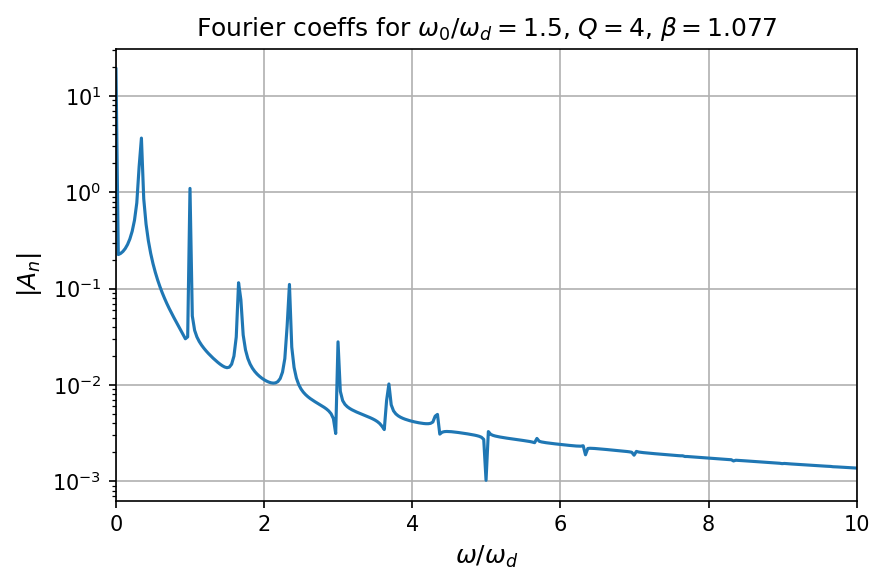

In [21]:
ddp.plot_spectrum(theta, omegad, omega0, beta, gamma, time, 24., ftsz)

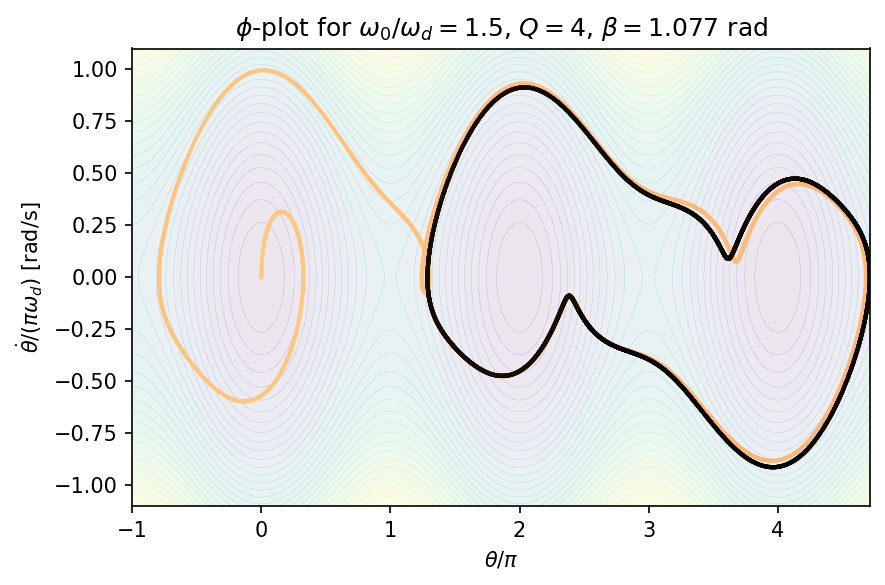

In [22]:
# theta_wrapped = ddp.wrap_theta(theta)
ddp.plot_phase(theta, dottheta, omegad, omega0, beta, gamma, time, ftsz, nconts=32)

Weee! The pendulum goes over the top, a lot.

Let me pause for a sec and comment on the fact that the pendulum goes over the top sometimes, and how the phase plot is moderately useful like this.
With the particular set of parameters I used ($\omega_d$, $\omega_0$, $\gamma$, $\beta$), the phase plot becomes kind of long.
Right now, it's OK: it goes over but stays in each potential well for a while, so, the plot is still readable.
But with more driving, the pendulum could undergo rolling motion.
And if it did, the plots in phase space could look kind of wild, with the angle jumping from potential well to potential well along the $\theta$ axis, making the phase plot very wide and details hard to read.
We therefore make the phase plot "periodic": if $\theta$ tries to "escape" on the left because it is doing a barrel roll clockwise, we make it re-enter the central potential well from the right.

In [24]:
def wrap_theta(th):
    """ map all theta values onto the branch -pi<theta<pi """
    th_wrapped = th[:] % (2*pi)  # First, move everything between [0, 2*pi]
    for i in range(len(th)):  # second, move everything between [pi, 2*pi] in [-pi, 0]
        if th_wrapped[i] > pi:
            th_wrapped[i] = th_wrapped[i] - 2*pi
    return th_wrapped

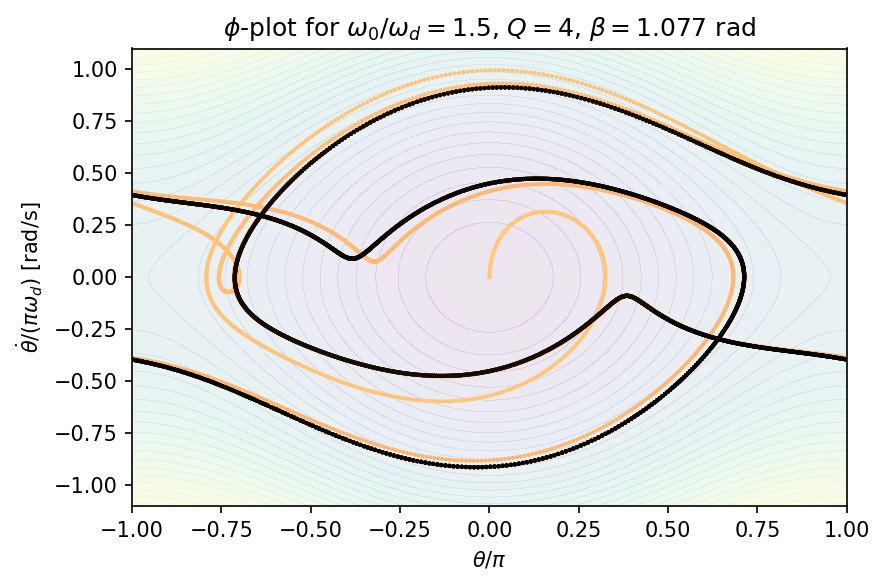

In [25]:
theta_wrapped = ddp.wrap_theta(theta)  # I prefer to use the one from the ddp module
ddp.plot_phase(theta_wrapped, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, nconts=32)

The Poincaré section is now more compact.

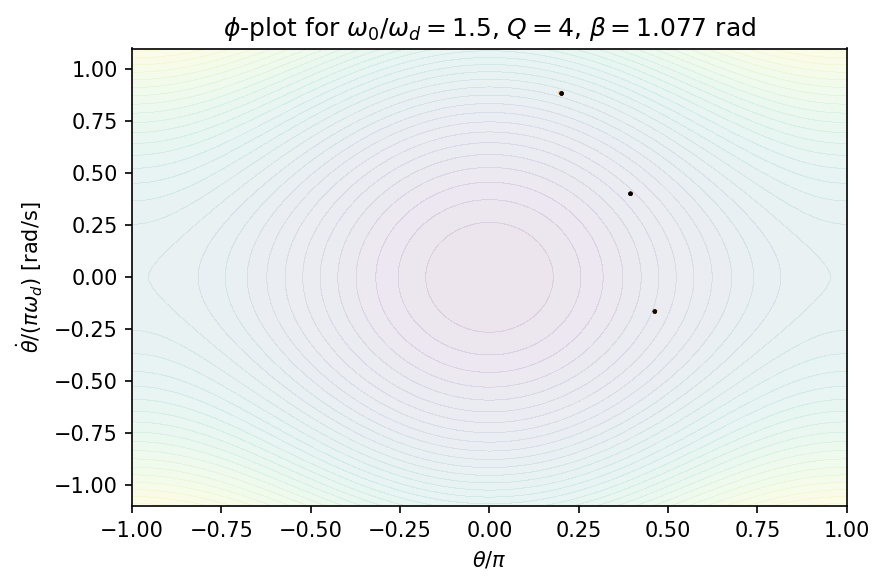

In [26]:
ddp.Poincare_section(num_cycles, ntTd, 4*ntTd, theta, dottheta,
                     time, omegad, omega0, gamma, beta, ftsz)

So, we now have a three-period cycle. What happened?

In 3D, with high enough non-linearity, the phase-space is separated into "basins of attraction": if the dynamics starts in one of these "basins", and if the driving isn't so high that it forces the system to cross basin boundaries, it will remain in it.
By changing the initial condition, we change which basin of attraction we start in.

## Chaos: $\beta=1.2$

When the driving is so high that the system keeps crossing basin boundaries, chaos can set in.

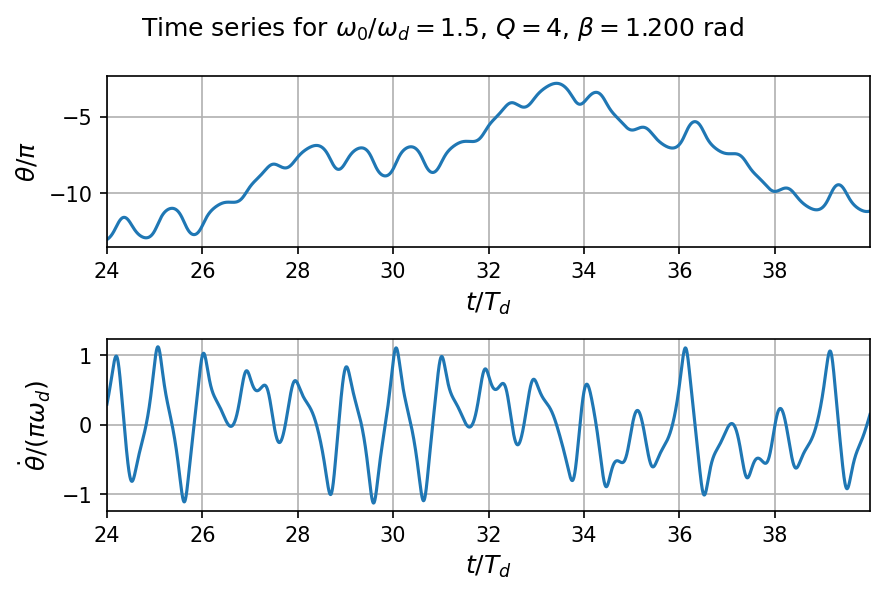

In [29]:
beta = 1.2  # have to re-run it
theta, dottheta = ddp.generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, time)
ddp.plot_TS(theta, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, tmin=24.)

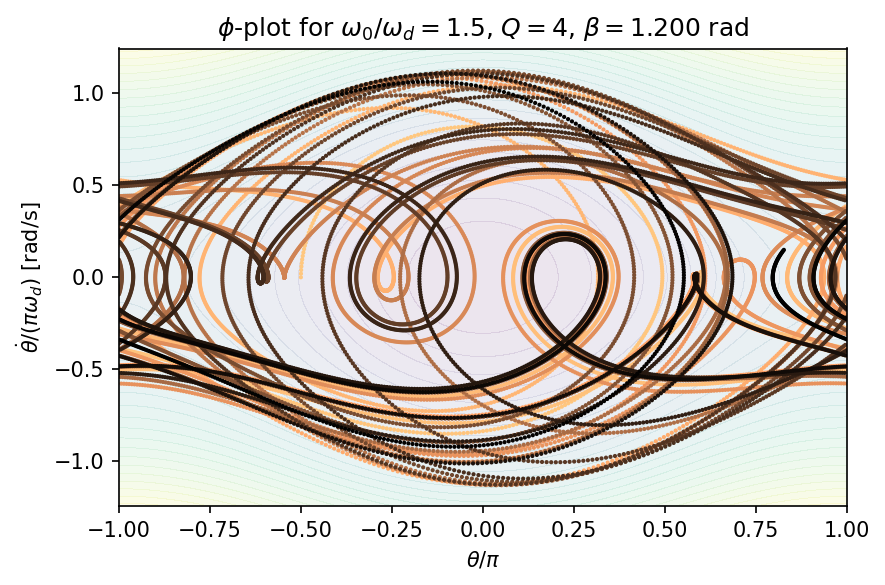

In [31]:
theta_wrapped = ddp.wrap_theta(theta)  # I prefer to use the one from the ddp module
ddp.plot_phase(theta_wrapped, dottheta, omegad, omega0, beta, gamma, time/Td, ftsz, nconts=32)

Periodicity is now hard to see. What is the Fourier spectrum saying?

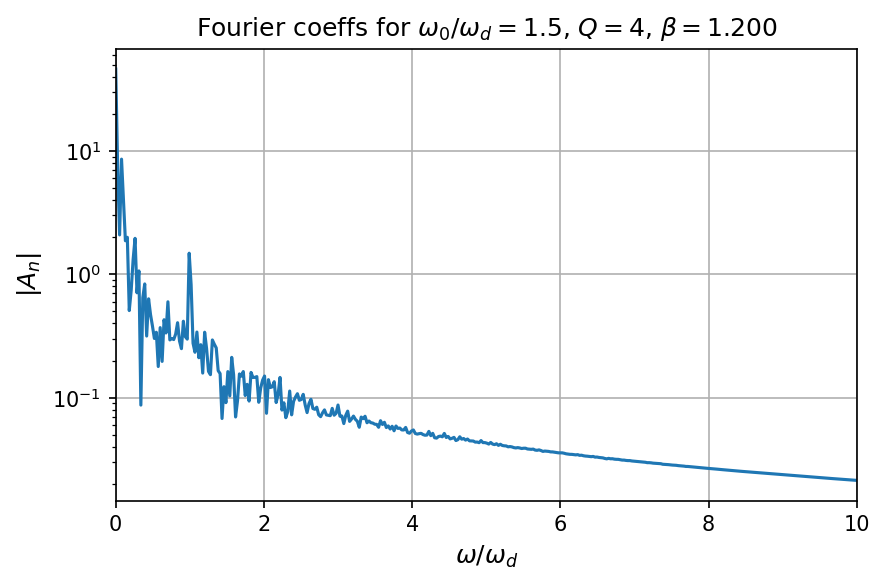

In [34]:
ddp.plot_spectrum(theta, omegad, omega0, beta, gamma, time, 5., ftsz)

So, the periodicity due to the driving is still there.
But besides that, it's a mess of frequencies: there are plenty of superharmonics, and they are not multiple of $\omega_d$.
But there are also *subharmonics*: frequencies that are less than $\omega$.
In fact, the lower-frequency signals appear more important, indicating that long-term motions (the drift from potential well to potential well each time the pendulum does a barrel roll is such an example).

We just witnessed the appearance of chaos: a very unpredictable dynamics, where periodicity gave way to all sorts of frequencies.

The Poincaré section at this point is not very informative because there aren't many points on it (see below).
I will then do a longer integration to collect more data.

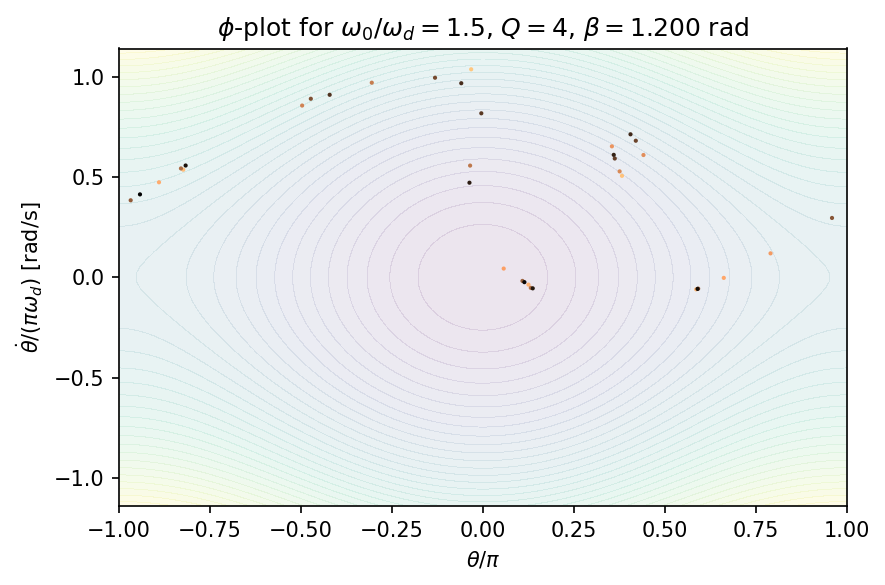

In [36]:
ddp.Poincare_section(num_cycles, ntTd, 4*ntTd, theta, dottheta,
                     time, omegad, omega0, gamma, beta, ftsz)

In [34]:
beta = 1.2  # have to re-run it
many_cycles = 1200
long_duration = many_cycles*Td
long_time = np.arange(0., long_duration, dt)  # initialize the time array
theta, dottheta = ddp.generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, long_time)

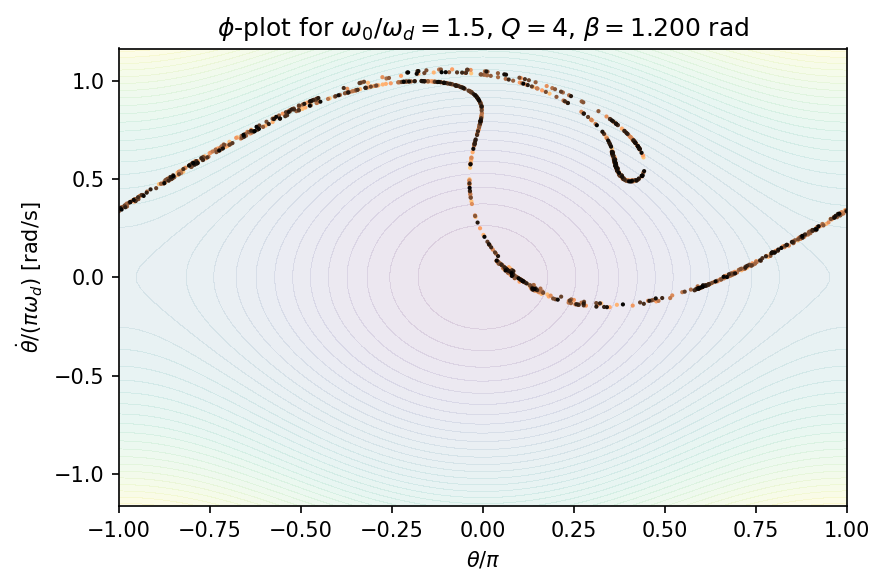

In [38]:
# For pdf export
ddp.Poincare_section(many_cycles, ntTd, 4*ntTd, theta, dottheta,
                     long_time, omegad, omega0, gamma, beta, ftsz)

In [35]:
# For some reason, the interactive slider doesn't work all the time
interact(ddp.Poincare_section, n_cyc=fixed(many_cycles), n_per_Td=fixed(ntTd),
         th=fixed(theta), dth=fixed(dottheta), t=fixed(long_time), wd=fixed(omegad),
         w0=fixed(omega0), g=fixed(gamma), b=fixed(beta), ftsz=fixed(ftsz),
         it_min=IntSlider(min=int(4.*ntTd), max=int(5.*ntTd), step=int(0.1*ntTd), value=4*ntTd))

interactive(children=(IntSlider(value=2000, description='it_min', max=2500, min=2000, step=50), Output()), _do…

<function ddp_routines.Poincare_section(n_cyc, n_per_Td, it_min, th, dth, t, wd, w0, g, b, ftsz)>

You can display a few Poincaré sections by changing the initial iteration via the parameter `it_min`, which should look like `4*ntTd`. If you change `4` into any number between 4 and 5 (don't forget to convert the number into an integer, e.g., `int(4.5*ntTd)`), you will get a different Poincaré section.
Or you can use the interactive slider in Jupyter.

The above is a lot more readable than the "raw" phase plot below.

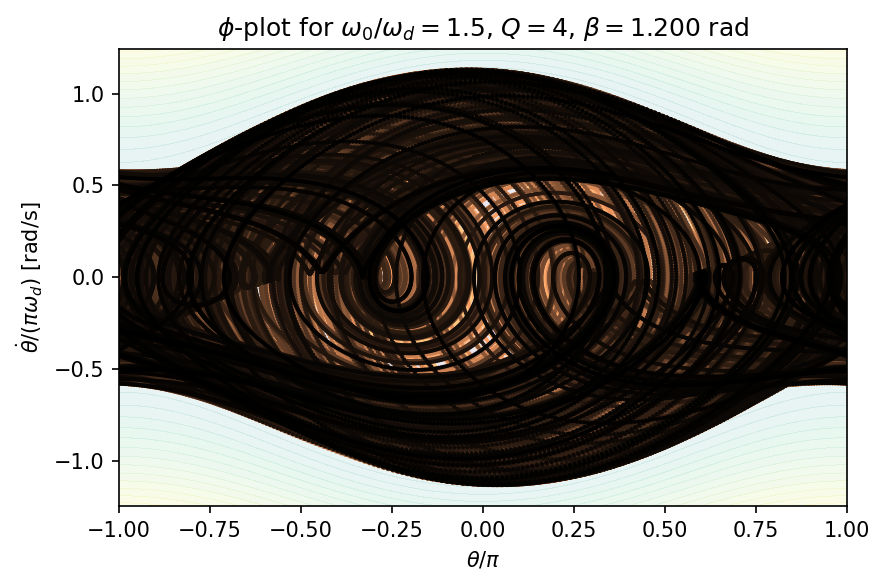

In [40]:
th_wrapped = ddp.wrap_theta(theta)
ddp.plot_phase(th_wrapped, dottheta, omegad, omega0, beta, gamma, long_time, ftsz, nconts=32)

If we were able to zoom (no, not that Zoom...), we would notice a complicated layered structure that occupies a compact region of phase space in the Poincaré section (believe me, or see figures 12.29 to 12.31 for Taylor).
This is no longer a single period cycle, or a two period cycle or a 10 period cycle.
The attractor in this case is "stranger" and hence, this attractor is known as a **strange attractor**.

The attractor has a self-similar structure: reappearance of certain patterns at smaller scales.
The structures you see in figures 12.29 to 12.31 in Taylor look the same no matter what the resolution you have.
This is a standard characteristic of a strange attractor.
A shape like this is said to have a "fractal dimension".

When you have a strange attractor, your system is chaotic.
This is because (as we will see later), it is hard to predict the location of your system at a particular time.
This is because the attractor is so complicated, you could be at any of an infinite number of points.
The problem then is if I start my system with two initial conditions that are *slightly* different, they can end up far apart at a later time.
Since its hard (actually impossible) for me to measure my exact initial condition, I don't know which scenario I actually started with.

Or you can take it the other way around: take any point ($\theta$, $\dot\theta$) in 2D phase space, and try to go back in time and calculate what the initial condition was. To do that, you will pick the closest trajectory and crank up time in the negative direction.
But what does "closest trajectory" mean when your dimension is fractal?
Whatever you pick, there will always be one that is closer, and that originated from a very different initial condition!

This **sensitivity to initial conditions** is the defining feature of chaotic systems.

# Bifurcation diagrams

So right now you have a picture in your head that as we increased $\beta$ we went from a single period attractor, to a 2 or 3-period attractor to a strange attractor.
What happens if we increase $\beta$ further?
The answer may surprise you: you can actually return to another single period cycle attractor!
It becomes very confusing, and bifurcation diagrams help, shedding some light on it.

But first, let's illustrate the return of the single-period attractor with $\beta = 1.35$.

In [41]:
beta = 1.35  # have to re-run it
theta, dottheta = ddp.generate_time_series(
    theta0, dottheta0, omegad, omega0, beta, gamma, time)

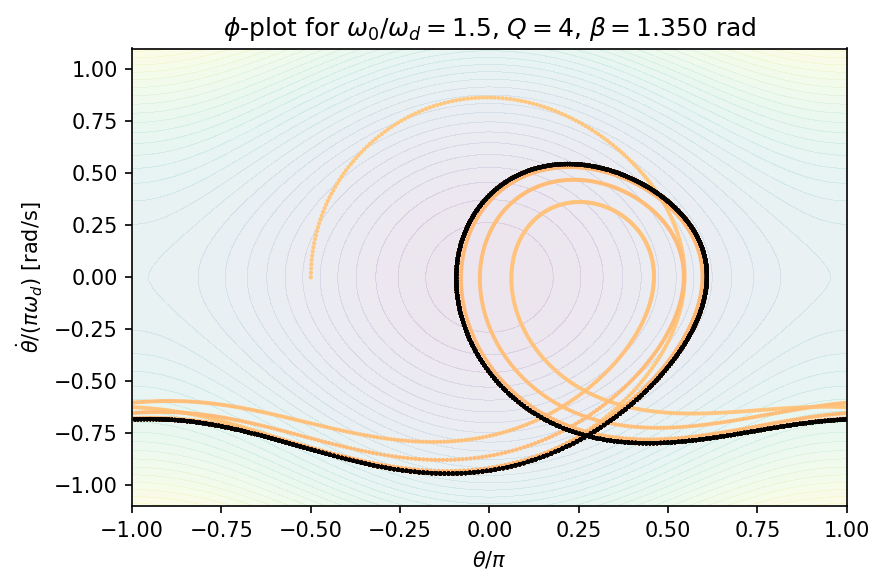

In [42]:
th_wrapped = ddp.wrap_theta(theta)
ddp.plot_phase(th_wrapped, dottheta, omegad, omega0, beta, gamma, time, ftsz, nconts=32)

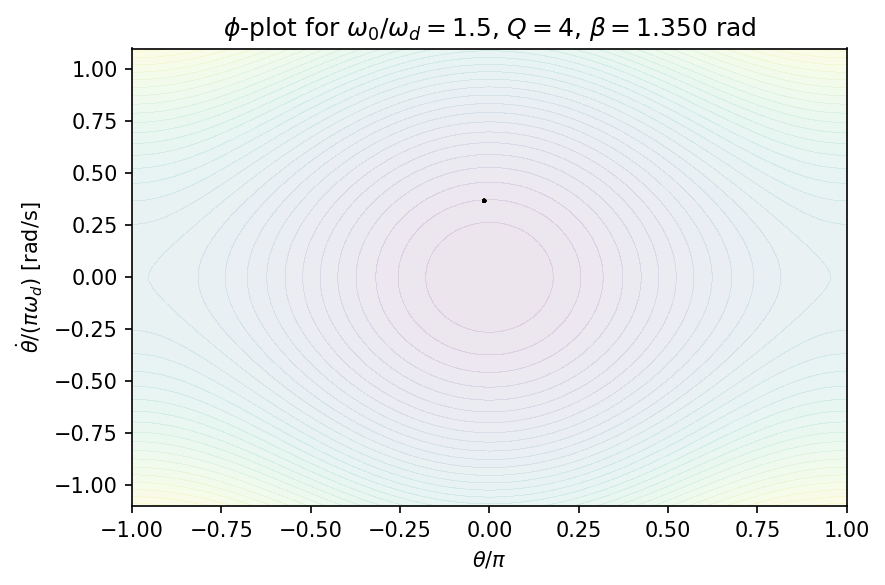

In [43]:
ddp.Poincare_section(num_cycles, ntTd, 4*ntTd, theta, dottheta,
                     time, omegad, omega0, gamma, beta, ftsz)

Go ahead, let a lol out. We increased the non-linearity from $\beta=1.2$ to $1.35$ and we are back to a single-period attractor, although the type of motion is quite different.
The pendulum is continuously spinning around the top in one direction.

As we continue to increase $\beta$ again (I will let you do it because I'm getting sick of copy-pasting lines of code; see the attached python scripts, with which you can modify and run in a more nimble way), we start getting period doubling just like we did before.
First we get a two period cycle at $\beta=1.45$, then at $\beta=1.47$ we get a 4 period cycle (note: the actual $\beta$ values might be slightly different on your computer), and the period keeps doubling as $\beta$ is increased until we get to another chaotic regime.
This period doubling is known as a  "subharmonic cascade" to chaos.

The behaviour is summarized in the "bifurcation diagram".
What you do is plot the $\theta$ value from your Poincaré section as a function of $\beta$.
So for $\beta$ values where you have a one period cycle, you have one dot on the curve, for $\beta$ values where you have a 2 period cycle, you have 2 values on the curve at the same $\beta$ value and so on.

Bifurcation plots take a while to produce: you need to scan through a lot of values of $\beta$, one-by one; for each of them, you need to integrate over a long time to have enough points on a Poincaré section; then you need to extract the Poincaré section from the whole time series, and then plot.
For this reason, I have not included cells where we can create a bifurcation diagram, because it would disrupt the flow of the Jupyter notebook.
If you want to reproduce them, you need to run the routine `ddp.plot_bifurcation` outside of this notebook (I provide a script called `ddp_bifurcation_plots.py` that does just that).
The routine in `ddp` is reproduce below.

In [44]:
def plot_bifurcation(bmin, bmax, nbs, wd, w0, g, th0, dth0, n_per_Td, ftsz):
    """ Bifurcation plot for the DDP; produces two: one for velocity,
    one for angle """

    # Redefine time quantities because bifurcation diagrams need more points
    Td = 2*pi/wd  # driving period
    dt = Td/n_per_Td  # time step
    num_cycles = 500  # number of driving periods
    t_end = num_cycles*Td  # final time

    t = np.arange(0., t_end, dt)  # initialize the time array

    it_min = 100*n_per_Td  # to eliminate transients

    # we will calculate time series for each of these
    beta_array = np.linspace(bmin, bmax, nbs)
    # this empty array will be the beta values of each dot
    x_values = np.empty(0)

    f1, ax1 = plt.subplots(1, 1, dpi=300)  # figure for theta
    f2, ax2 = plt.subplots(1, 1, dpi=300)  # figure for dtheta/dt

    for beta in beta_array:  # scan through values of beta
        # Generate time series with two different initial conditions
        for th0 in [0., -pi/2]:
            thvals, dthvals = generate_time_series(th0, dth0, wd, w0, beta, g,
                                                   t)

            # Select which points we need, like in the Poincare section
            # start at it_min, skip every n_per_cyc
            Pc_thvals = wrap_theta(thvals[it_min::n_per_Td])/pi
            Pc_dthvals = dthvals[it_min::n_per_Td]/pi/wd

            # We now have computed the values for this beta, we add to the plot
            # Below is an array of same length as Pc_vals full of beta
            x_values = np.full(len(Pc_thvals), beta)
            ax1.plot(x_values, Pc_thvals, 'b.', markersize=1.)
            ax2.plot(x_values, Pc_dthvals, 'g.', markersize=1.)

    # Finish the plot for theta
    ax1.set_xlabel(r'$\beta$ [rad]', fontsize=ftsz)
    ax1.set_ylabel(r'$\theta/\pi$', fontsize=ftsz)
    ax1.set_title(r"Bifurcation plot for " +
                  r"$\omega_0/\omega_d = {0:.1f}$, ".format(w0/wd) +
                  r"$Q = {0:.0f}$".format(w0/g), fontsize=ftsz)
    ax1.grid()
    f1.tight_layout()
    f1.savefig('ddp_bifurcation_bmin{0:.0f}_bmax{1:.0f}_theta.png'.format(
        1000*bmin, 1000*bmax))

    # Finish the plot for dtheta
    ax2.set_xlabel(r'$\beta$ [rad]', fontsize=ftsz)
    ax2.set_ylabel(r'$\dot\theta/(\pi\omega_d)$', fontsize=ftsz)
    ax2.set_title(r"Bifurcation plot for " +
                  r"$\omega_0/\omega_d = {0:.1f}$, ".format(w0/wd) +
                  r"$Q = {0:.0f}$".format(w0/g), fontsize=ftsz)
    ax2.grid()
    f2.tight_layout()
    f2.savefig('ddp_bifurcation_bmin{0:.0f}_bmax{1:.0f}_dtheta.png'.format(
        1000*bmin, 1000*bmax))

    # plt.show()  # showing would pause the calculation
    return

In [45]:
# ddp.plot_bifurcation(0.9, 1.5, 200, omegad, omega0, gamma, theta0, dottheta0, ntTd, ftsz, qtty='')
# The above cell would have taken too long to run; I will just include the pictures.

![](ddp_bifurcation_bmin900_bmax1500_theta.png)

Note: we can make our bifurcation diagram by plotting either $\theta$ or $\dot \theta$ from our Poincaré section.
The shape of the figure would look more or less the same, but the numbers would change.

Notice the intervals in $\beta$ where the chaotic regions because un-chaotic again, e.g., for $\beta = 1.35$, wihch we investigated before. And watch them go through a subharmonic cascade again!

The bifurcation diagram also exhibits a self-similar structure, which we can check by plotting a new bifurcation diagram over the more restricted range $1.06\leq\beta\leq 1.086$.

In [46]:
# plot_bifurcation(1.06, 1.0865, 200, omegad, omega0, gamma, theta0, dottheta0, ntTd, ftsz, qtty='')

![](ddp_bifurcation_bmin1060_bmax1086_theta.png)

And below, I am zooming in even more.

![](ddp_bifurcation_bmin1076_bmax1083_theta.png)

# Maps as chaotic systems

## Presentation of the logistic map

Even though the damped driven pendulum (DDP) is a physically "simple" system (i.e., the equations aren't that complicated), we can see chaotic behaviour in even simpler mathematical systems.
To understand chaos at a more basic level, we turn to *difference equations}*.
Difference equations are not continuous equations.
They tell you the value of a variable in a sequence based on the values of the variable earlier in the sequence.    

A famous difference equation is the **logistic map**,
$$x_{n+1}=\mu x_n (1-x_n),\with \mu \text{ some constant,}$$
which is an equation used in population dynamics.
If we know the initial value $x_0$, this equation can give $x_1$, which we can then use to get $x_2$ and so on.
So this equation gives you a sequence of values for $x$.
I should note that for the logistic map, you restrict *starting* values of $x$ between $0$ and $1$.
It is called a map because you essentially "map" a point based on the value from the previous point.


You've actually used difference equations already:

* Numerical integration in Python, `x[i+1]=x[i] + v[i]*dt`, has exactly the form of a difference equation.
    Any differential equation can be represented by a difference equation which is why they are relevant for physics.
* Poincare sections can be represented in a 2D map, as in,
    $$\theta_{n+1}=G_1(\theta_n, \dot\theta_n), \ \dot\theta_{n+1}=G_2(\theta_n,\dot\theta_n),$$
    where $G_1$ and $G_2$ are functions that give you the new point's location from the old point's location.

Back to the logistic map.
This is one of the most standard maps you will see in any Chaos book, it is relatively easy to understand and i s even found in some "general audience" books about chaos.

The graph of $\mu x (1-x)$ is parabolic (see below), but think about what the axes represent.  The horizontal axis is the value of $x_n$ and the vertical axis is the value of $x_{n+1}$.

Just like in our ODEs for the damped double pendulum, we are interested in the evolution of this system (i.e. what are the values of $x_{n+1}$ for large $n$?  Are there any "stable fixed points" (i.e., point attractors).  Are any of them "strange attractors"?
To find the attractors we can apply a nice geometric method.  

The logistic map (and other maps) can be considered as a set of instructions, a.k.a. an algorithm:

1. For value $x$, calculate $y=\mu x(1-x)$,
2. set $x=y$,
3. Repeat.

This process can be envisioned graphically if we plot both the logistic equation and the line $y=x$ on the same graph.
I am going to use dashed red lines to represent the steps above.
Starting from $x_n = x_0$ on the horizontal axis, I will move vertically up to the logistic curve to find my $x_{n+1}$ value (step 1, dashed red lines).
Then I will set this $y$ value to my $x$ value by moving horizontally from my point to the line $y=x$ (step 2, dash-dotted green lines).
Then I will repeat the process until we have done 100 steps, whichever comes first.

In [17]:
def iterate_logistic_map(mu, x0):
    xns = [x0]  # one element for now
    old_x = 0.
    x = x0
    counter = 0  # counting how many steps
    while counter < 400:
        counter += 1
        y = mu*x*(1-x)  # do step 1
        old_x = x
        x = y  # do step 2
        xns.append(y)  # add the next value to the list
        
    return xns

In [18]:
def plot_logistic_map(mu, x0, skip_n_ites=0):
    """ x0 is the first value, skip_n_ites (optional) allows one to skip the transient """
    x = np.linspace(0, 1, 100)  # array of x_n's to plot x_{n+1}
    y = mu*x*(1.0-x)  # array of x_{n+1}'s

    # Plot the logistic map
    plt.subplot(1, 2, 1)
    plt.plot(x, y, 'b')
    plt.plot(x, x, 'k')

    # now do the steps
    list_of_xn = iterate_logistic_map(mu, x0)
    for n in range(skip_n_ites, len(list_of_xn)-1):
        xn = list_of_xn[n]
        yn = list_of_xn[n+1]
        if n == 0:
            plt.plot([xn, xn], [0, yn], 'r--')  # plot step 1
        else:
            plt.plot([xn, xn], [xn, yn], 'r--')  # plot step 1
        plt.plot([xn, yn], [yn, yn], 'g-.')  # plot step 2

    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('$x_n$')
    plt.ylabel('$x_{n+1}$')
    
    plt.subplot(1, 2, 2)
    plt.plot(list_of_xn)
    plt.xlim(skip_n_ites, len(list_of_xn)-1)
    plt.xlabel('$n$')
    plt.ylabel('$x_n$')
    plt.grid()
    
    plt.suptitle('Logistic Map for $\mu = {0:.1f}$'.format(mu))

    plt.tight_layout()
    plt.show()
    return

## $\mu < 1$

I will start by considering a $\mu$ value less than one, say $\mu=0.9$.
Let's start with any initial $x_0$ value between 0 and 1 (say $x_0=0.8$), and run the program.

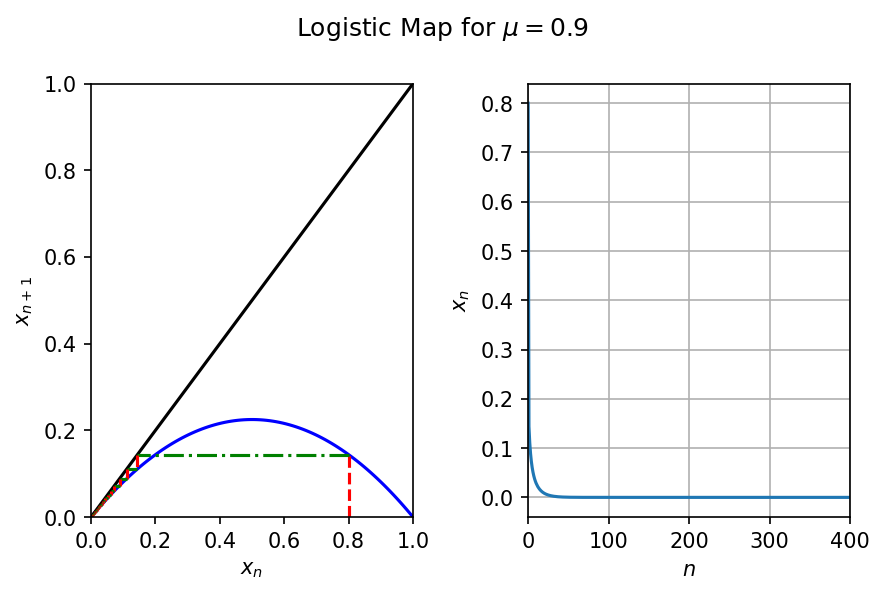

In [19]:
plot_logistic_map(0.9, 0.8)

We find that $x$ always heads to the origin.
The origin is a "stable fixed point", or "point attractors" (like the valleys in potential plots) in this case.

## $\mu >1$

### $\mu = 2.5$

Let's increase $\mu$ to 2.5.
Again, start with any $x_0$ value between 0 and 1 (you can try a few) and run the program.

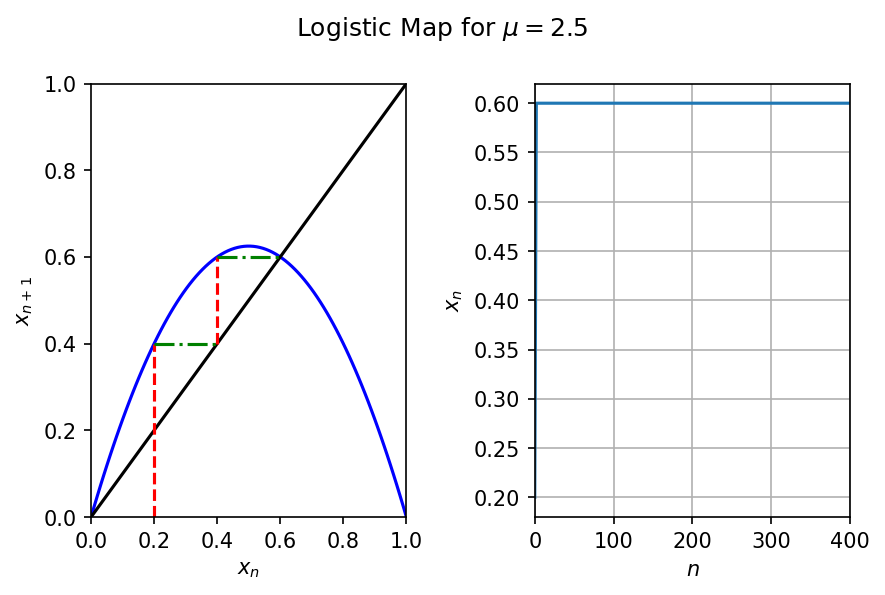

In [20]:
plot_logistic_map(2.5, 0.2)

Now, $x$ heads to the intersection of the $y=x$ and $y=\mu x(1-x)$ curves.
This is true for all initial $x$ values *except* for $x_0=0$, in which case $y=0$ and $x_n$ stays at 0.
In this case $x=0$ is an "unstable fixed point" (like the hills in potential plots) and the other $x$ value is a "stable fixed point".
We can solve for the location of the intersection between $y=x$ and $y=\mu x(1-x)$ by setting the right hand sides of the equations equal to each other and find that the stable fixed point occurs at $x=1-1/\mu$.

At this point we have found that for $\mu<1$ we have a single stable fixed point (i.e. a 1-cycle attractor).  At $\mu =1$ the stable fixed point changes to $x=1-1/\mu$, but it is still a 1-cycle attractor.
We are calling them "cycle attractors" because they are maps, and we are treating them like we would the Poincaré sections from the last lecture.  What happens as we keep increasing $\mu$?

### $\mu = 3.3$

As we start increasing $\mu$ values further, we can find some interesting things happen to our fixed point.  Eventually this fixed point becomes unstable and we get a "period doubling" (same as with the DDP).

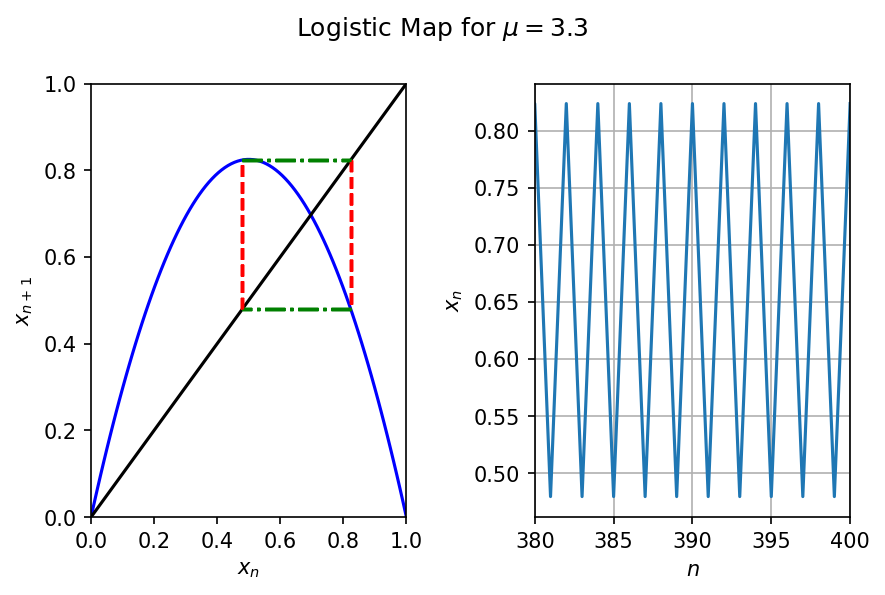

In [21]:
plot_logistic_map(3.3, 0.8, 380)

At $\mu=3.3$, $x_n$ eventually bounces between 2 points on the logistic curve.
We now have a 2-cycle attractor.

As we increase $\mu$ further, we go through a sequence of period doublings, i.e., a **subharmonic cascade**, and eventually, we get chaos. E.g. at $\mu = 3.5$: 4 cycle attractor, $\mu=3.55$: 8 cycle attractor, $\mu=3.9$: chaotic.

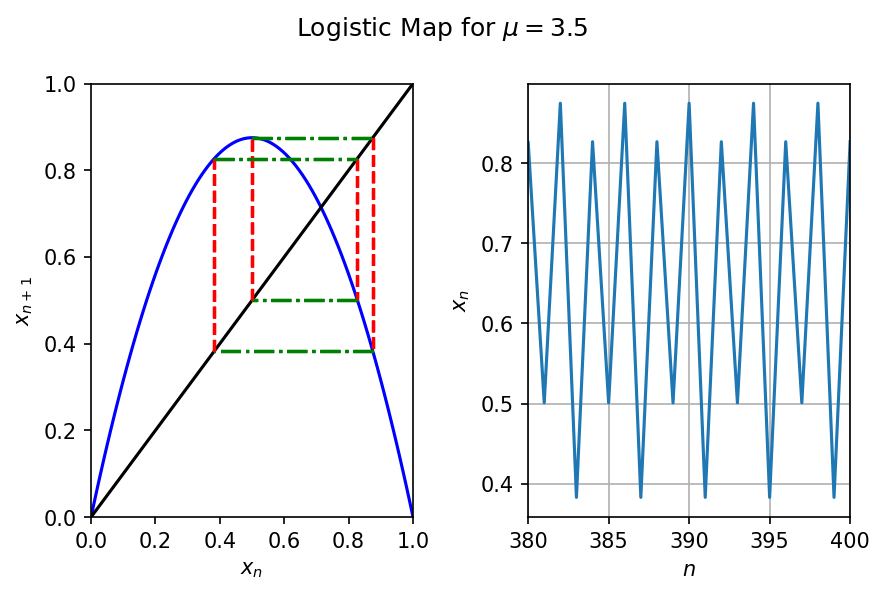

In [22]:
plot_logistic_map(3.5, 0.8, 380)

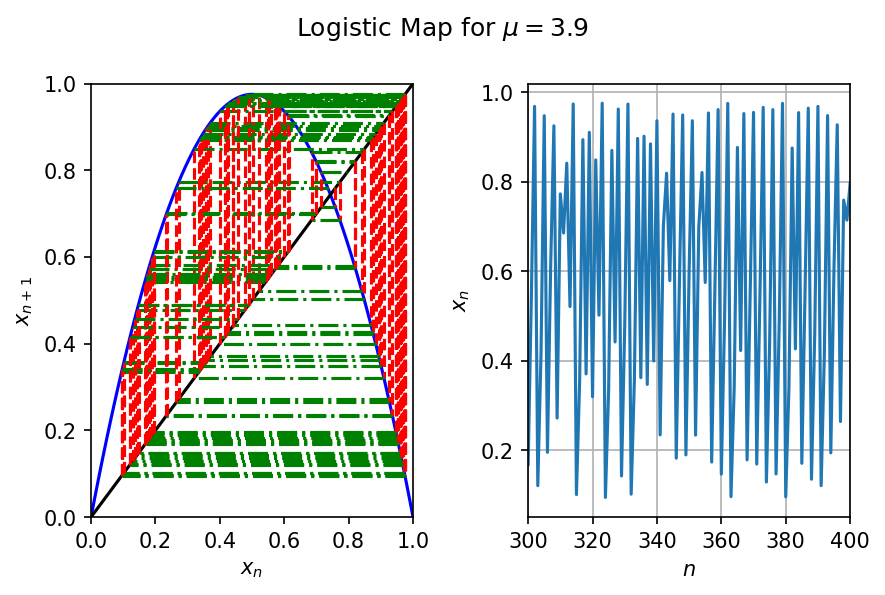

In [23]:
plot_logistic_map(3.9, 0.8, 300)

Just like with the DDP, we can plot a bifurcation diagram for the logistic map (i.e. plot the stable fixed points as a function of $\mu$).

In [24]:
def bifurcation_logistic(mumin, mumax, skip_n_ites, ymin=0, ymax=1):
    """ Bifurcation plot """
    x0 = 0.8  # no need to vary it
    mus = np.linspace(mumin, mumax, 400)
    for mu in mus:
        list_of_xn = iterate_logistic_map(mu, x0)
        reduced_list_of_xn = list_of_xn[skip_n_ites:]
        x_values = np.full(len(reduced_list_of_xn), mu)  # array full of mu
        plt.plot(x_values, reduced_list_of_xn, 'b.', markersize=1.)
        
    plt.xlabel('$\mu$')
    plt.ylabel('Stationary values of $x_n$')
    plt.title('Bifurcation diagram for the logistic map')
    plt.xlim(mumin, mumax)
    plt.ylim(ymin, ymax)
    plt.grid()
    plt.tight_layout()
    plt.show()
    return

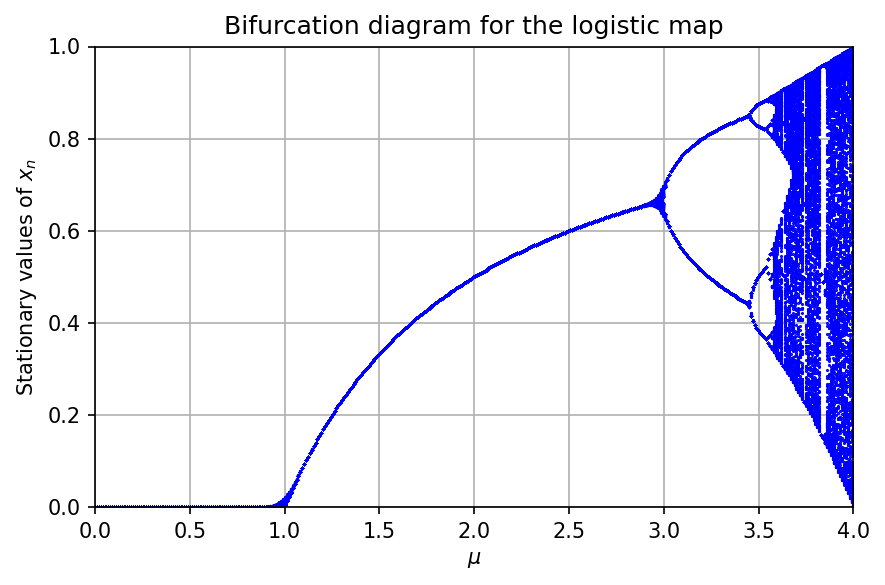

In [25]:
bifurcation_logistic(0, 4, 40)

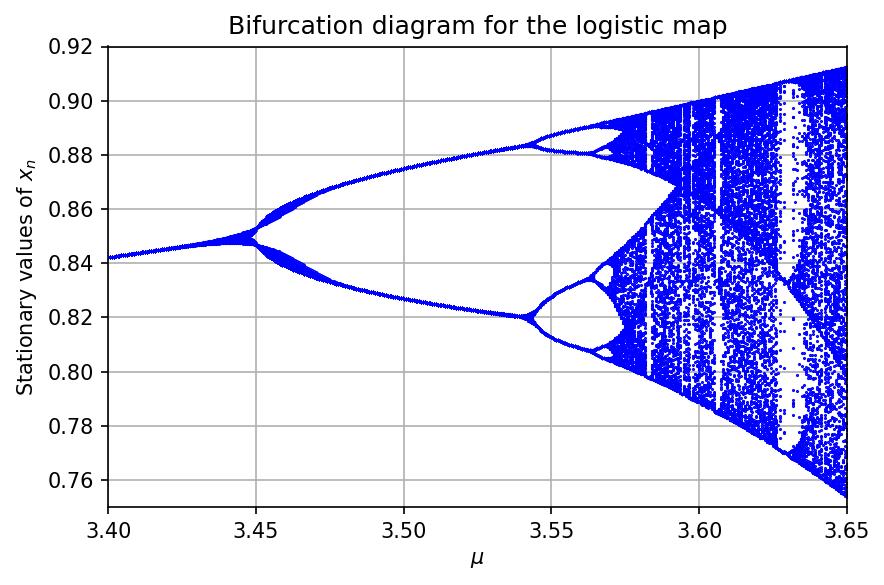

In [26]:
bifurcation_logistic(3.4, 3.65, 40, ymin=0.75, ymax=0.92)

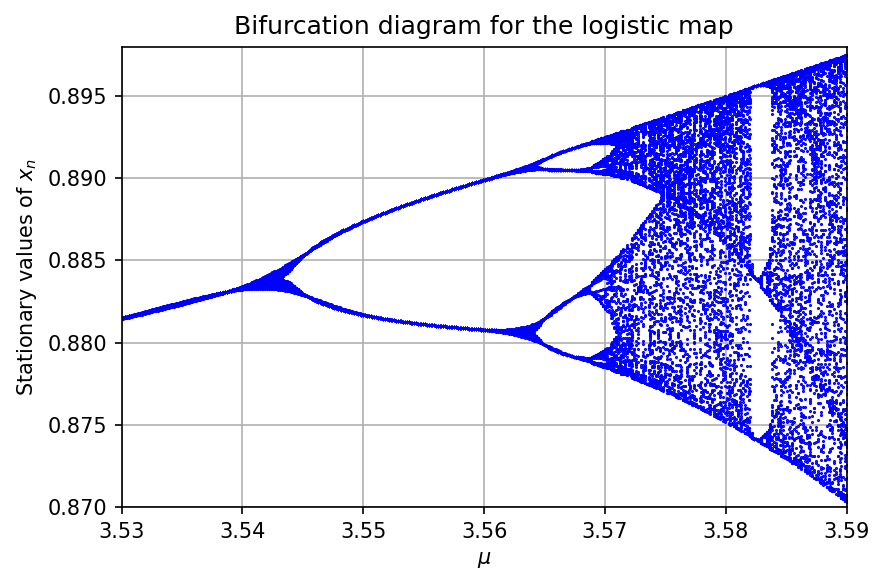

In [27]:
bifurcation_logistic(3.53, 3.59, 40, ymin=0.87, ymax=0.898)

The 2nd and 3rd plots are just magnifications (actually, we ran new sets of simulations each time) of the first plot.
Their resemblance is striking, but pay attention to the axes ranges, and try to map each one on the preceding plot: you should see that one plot is really a small piece of the preceding plot.
Notice the period doublings and eventual chaotic regions.
Also notice the "windows" where the chaotic regions because un-chaotic again and then go through a subharmonic cascade again!

The bifurcation diagram has a structure similar to that for the DDP. Both the DDP and the logistic map exhibit the "period doubling route to chaos".
This route consists of a sequence of pitchfork bifurcations that get closer and closer to each other.
Your cycles go from 2 to 4 to 8 to 16 to 32, and eventually to infinity.
An 'infinite' period cycle is a chaotic cycle.

# Sensitive dependence to initial conditions and Lyapunov exponent

The last feature of chaotic systems we will discuss was also the first we mentioned: the divergence of initially close initial conditions.

We are going to watch the evolution of a system over time from some initial condition.
Then we are going to watch the same system's evolution for an initial condition that is not the same as our first one, but is really close to it.
For non-chaotic systems, the difference between the trajectories will not grow (i.e. if the trajectories start close together, they stay close together).
For chaotic systems, the error will grow.

We could use either the DDP or the logistic map to illustrate this, but the latter is much easier on my computer.

Suppose we have two trajectories with initial values $x_0^{(1)}$ and $x_0^{(2)} = x_0^{(1)} + \epsilon$.
Suppose that after $n$ iterations (or time periods), we express their difference as
\begin{equation}
    |x_n^{(2)}- x_n^{(1)}|\approx | \epsilon|\eexp{n\lambda},
    \label{eq:Lyap1}
\end{equation}
where $\lambda$ is called the **Lyapunov exponent**.[^4]

[^4]: Taylor writes it Liapunov, those are two different transcriptions of the same Cyrillic letter pronounced "ia" (the flipped R). Potatoes, potatoz. The one with a "y" is much more frequent though.

Note that we are assuming that the growth or decay will be exponential.  We will be able to test this when we get our values.

* If $\lambda<0$, solutions converge exponentially over time. E.g., stable case for free damped pendulum.
* If $\lambda=0$, then the trajectories stay the same distance apart. E.g., stable case for undamped pendulum.
* If $\lambda>0$, the trajectories diverge exponentially over time. So, a slight error in the initial conditions can quickly lead to huge differences in the solutions.

We can rewrite equation \eqref{eq:Lyap1} as
$$|x_n^{(2)}- x_n^{(1)}| = \eexp{n\lambda}\eexp{\ln |\epsilon|}= \eexp{n\lambda + \ln|\epsilon|} $$

If we take the log of both sides, we get
$$\ln |x_n^{(2)}- x_n^{(1)}|=n\lambda + \ln|\epsilon| $$

So if we plot $\ln |x_n^{(2)}-x_n^{(1)}|$ vs $n$, the slope of our graph will give us $\lambda$, the Lyapunov exponent.
And if these graphs have positive slopes, then the trajectories diverge, and if the graph actually looks linear, then they diverge exponentially.
We will only *diagnose* $\lambda$, our exponential assumption in equation~\eqref{eq:Lyap1} will never enter the procedure, expect to measure it at the very end if the plots are indeed linear.
And if they are, our assumption will be validated.

Lets iterate the logistic map for a non-chaotic $\mu$ value: say $\mu=2.0$ (left plot below) and a chaotic value: say $\mu=3.8$ (right pot below).

In [28]:
def lyapunov_logistic(mu, x01, epsilon):
    """ iterate the two maps in parallel and compute their difference at each step. """
    def map_it(x):
        return mu*x*(1-x)
    
    npts = 60
    difference = np.empty(npts)
    x1 = x01
    x2 = x01 + epsilon
    difference[0] = x2 - x1
    
    for n in range(1, npts):  # should be enough
        y1, y2 = map_it(x1), map_it(x2)
        difference[n] = y2-y1
        x1, x2 = y1, y2
    
    return difference

In [29]:
def plot_two_divergences(mu1, mu2, x01, epsilon):
    """ Run two divergences side-by-side """
    diff1 = lyapunov_logistic(mu1, x01, epsilon)  # first mu
    diff2 = lyapunov_logistic(mu2, x01, epsilon)  # second mu
    
    plt.subplot(2, 1, 1)
    plt.semilogy(abs(diff1))
    plt.xlabel('$n$')
    plt.ylabel('$|x_n^{(2)}- x_n^{(1)}|$')
    plt.title(r"$\mu = {}$".format(mu1))
    plt.grid()
    
    plt.subplot(2, 1, 2)
    plt.semilogy(abs(diff2))
    plt.xlabel('$n$')
    plt.ylabel('$|x_n^{(2)}- x_n^{(1)}|$')
    plt.title(r"$\mu = {}$".format(mu2))
    plt.grid()
    
    plt.tight_layout()
    return

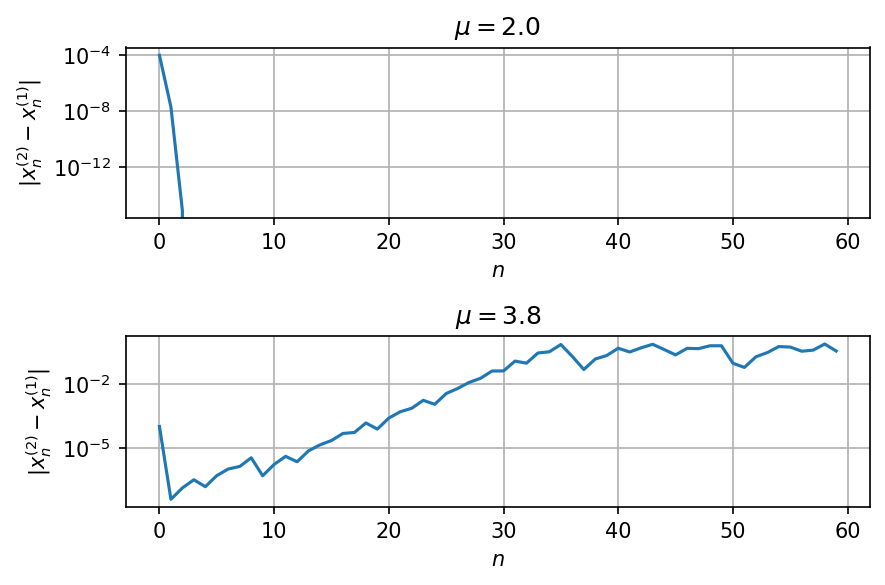

In [30]:
plot_two_divergences(2.0, 3.8, 0.5, 1e-4)

Notice that the curve in the left plot is 0.  This means that the difference actually went to zero and the logarithm buckled.
The Lyapunov exponent is therefore 0 and our solutions do not diverge.

The slope in the right plot is positive and the graph is linear, at least until $n\approx 35$.
After that, the difference saturates around 1 because the output can only be between 0 and 1.
The can be less that one, but it hovers at or below it, meaning the solutions have diverged as far apart as they could.
The concept of the  Lyapunov exponent is therefore only valid in the $1\leq n \leq 35$ phase, where it is $>$0 and our solutions diverge exponentially.
You could calculate the actual Lyapunov exponent by finding the slope of this graph.

Positive Lyapunov exponents occur in many systems, e.g., turbulence, weather, nonlinear circuits, etc..  These are all systems that exhibit chaos.

It is this divergence of trajectories that defines the **sensitive dependence on initial conditions**.
This is why we can't predict systems that are chaotic.
If we don't know the initial condition perfectly (which we can't) then we don't know what trajectory we are on, and hence we don't know where we will be on the strange attractor at some later time.

# Summary

The hallmarks of chaos are

* For the system
    $$\dot x_n=F_n(x_1,...,x_N), \quad n=1 \rightarrow N$$ we need $N\ge 3$ and at least one of the  $F_i$ to be nonlinear for chaos to be possible.
* Subharmonic cascade via period doubling is a route to chaos.
* Poincaré maps showing strange attractors with fractal (non-integer) dimension and self-similar structure.
* Sensitive dependence on initial conditions: Exponential divergence of solutions.